# Exploración inicial de los datasets IMDB

Este notebook realiza la exploración inicial de los dos conjuntos de datos en bruto
utilizados en el proyecto:

- Metadata de películas
- Reviews de usuarios (50K)

El objetivo es entender la estructura de los datos, detectar problemas de calidad
y evaluar la viabilidad de su unión para el análisis posterior.


CARGA Y ESTRUCTURACIÓN DE DATASETS

In [2]:
import pandas as pd
import numpy as np


In [4]:
import os
os.getcwd()


'c:\\Users\\Raúl\\Desktop\\DATA ANALYTICS\\9 TFM\\PROYECTO\\imdb-data-analytics-project\\notebooks'

In [5]:
os.listdir("../data/raw")


['IMDB Dataset.csv', 'imdb_movies.csv']

In [6]:
imdb_dataset = pd.read_csv("../data/raw/IMDB Dataset.csv")
imdb_movies = pd.read_csv("../data/raw/imdb_movies.csv")

imdb_dataset.shape, imdb_movies.shape

((50000, 2), (10178, 12))

In [7]:
import pandas as pd
import numpy as np


In [8]:
imdb_dataset = pd.read_csv("../data/raw/IMDB Dataset.csv")
imdb_movies = pd.read_csv("../data/raw/imdb_movies.csv")


In [9]:
imdb_dataset.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
imdb_dataset.info() # Se revisa la estructura del dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [15]:
imdb_movies.info() # Se revisa la estructura de este dataset también.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [16]:
imdb_dataset.columns # Ahora vamos con los nombres de las columnas para revisar la calidad de los datos.


Index(['review', 'sentiment'], dtype='object')

In [17]:
imdb_movies.columns # De la misma forma que en el anterior dataset.


Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [19]:
# Quitamos los valores nulos.
imdb_dataset.isna().sum().sort_values(ascending=False)


review       0
sentiment    0
dtype: int64

In [20]:
imdb_movies.isna().sum().sort_values(ascending=False) # Misma operación que en anterior dataset.

genre         85
crew          56
date_x         0
names          0
score          0
overview       0
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [24]:
imdb_dataset.describe(include="all") # datos estadísticos.
imdb_movies.describe(include="all") # Los usaré más adelante posiblemente.



,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
count,10178,10178,10178.000000,10093,10178,10122,10178,10178,10178,1.017800e+04,1.017800e+04,10178
unique,9660,5688,NaN,2303,9905,9927,9736,3,54,NaN,NaN,60
top,Pinocchio,04/07/2023,NaN,Drama,We don't have an overview translated in Englis...,"Jim Parsons, Oh (voice), Rihanna, Gratuity 'Ti...",Pinocchio,Released,English,NaN,NaN,AU
freq,12,41,NaN,556,89,3,12,10131,7417,NaN,NaN,4885
mean,NaN,NaN,63.497052,NaN,NaN,NaN,NaN,NaN,NaN,6.488238e+07,2.531401e+08,NaN
std,NaN,NaN,13.537012,NaN,NaN,NaN,NaN,NaN,NaN,5.707565e+07,2.777880e+08,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+07,2.858898e+07,NaN
50%,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+07,1.529349e+08,NaN
75%,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.050000e+08,4.178021e+08,NaN


In [26]:
# calculo duplicados si los hubiera.
imdb_dataset.duplicated().sum()
imdb_movies.duplicated().sum()


np.int64(0)

In [28]:
# finalmente busco columnas que tengan relación, es decir, sean comunes entre sí.
set(imdb_dataset.columns) & set(imdb_movies.columns)
# No existen columnas comunes según la respuesta. Por tanto habrá que hacer más pasos antes de la union entre ambos datasets.

set()

LIMPIEZA Y PREPARAZIÓN DE DATOS


In [29]:
imdb_movies.columns


Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [30]:
imdb_dataset.columns

Index(['review', 'sentiment'], dtype='object')

In [31]:
# efectivamente no hay columnas comunes por lo cual habrá que hacer un dataset final mediante métrical agregadas.
# empezando por dejar la columna de titulo limpia. 
imdb_movies['title_clean'] = (
    imdb_movies['names']
    .str.lower()
    .str.strip()
)


In [32]:
#también limpiamos la la fecha y el género.
imdb_movies['release_year'] = pd.to_datetime(imdb_movies['date_x'], errors='coerce').dt.year
imdb_movies['genre_list'] = imdb_movies['genre'].str.split(',')


In [33]:
# a su vez y para la unión, limpiamos la columna a utilizar en el otro dataset.
imdb_dataset['sentiment'] = imdb_dataset['sentiment'].str.lower()


In [37]:
# Ya se pueden generar datos agregados.
sentiment_summary = imdb_dataset['sentiment'].value_counts(normalize=True)
sentiment_summary


sentiment
positive    0.5
negative    0.5
Name: proportion, dtype: float64

In [41]:
import os

os.makedirs("../data/processed", exist_ok=True)

# se crea una carpeta nueva para los nuevos datasets procesados y limpios.

In [42]:
imdb_movies.to_csv("../data/processed/imdb_movies_clean.csv", index=False)
imdb_dataset.to_csv("../data/processed/imdb_reviews_clean.csv", index=False)

# Guardo los dos datasets en la carpeta recientemente creada.


CREACIÓN DE DATASET FINAL

In [1]:
import pandas as pd
import numpy as np

movies = pd.read_csv("../data/processed/imdb_movies_clean.csv")
reviews = pd.read_csv("../data/processed/imdb_reviews_clean.csv")


In [2]:
# Hacemos la prueba para verificar que se importó bien.
movies.shape, reviews.shape


((10178, 15), (50000, 2))

In [3]:
movies.columns


Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country', 'title_clean',
       'release_year', 'genre_list'],
      dtype='object')

In [4]:
reviews.columns


Index(['review', 'sentiment'], dtype='object')

In [9]:
# Se me reinicia el vscode, importo de nuevo librerias y datos.

import pandas as pd
import numpy as np

# Carga de datasets en bruto
imdb_dataset = pd.read_csv("../data/raw/IMDB Dataset.csv")
imdb_movies = pd.read_csv("../data/raw/imdb_movies.csv")


In [11]:
# Ahora vamos a empezar creando métricas agregadas según la columna sentiment el dataset de reviews.
# Primero hay que analizar el dataset de reviews.

imdb_reviews_clean = imdb_dataset.copy()

imdb_reviews_clean.drop_duplicates(inplace=True)
imdb_reviews_clean.dropna(inplace=True)

# así se puede ver la distribución de los sentimientos en las reviews.


In [12]:
imdb_reviews_clean["sentiment"].value_counts(normalize=True)
# % de reviews positivas y negativas:


sentiment
positive    0.501876
negative    0.498124
Name: proportion, dtype: float64

In [13]:
# Visto que la proporción es bastante pareja, transformamos el análisis en variables uilizables. Es decir, creamos la métricas agregadas.

total_reviews = len(imdb_reviews_clean)

positive_reviews = (imdb_reviews_clean["sentiment"] == "positive").sum()
negative_reviews = (imdb_reviews_clean["sentiment"] == "negative").sum()

positive_ratio = positive_reviews / total_reviews
negative_ratio = negative_reviews / total_reviews

total_reviews, positive_reviews, negative_reviews


(49582, np.int64(24884), np.int64(24698))

In [15]:
positive_ratio, negative_ratio
# ratio de psitivas y negativas.

(np.float64(0.5018756806905732), np.float64(0.4981243193094268))

In [ ]:
# Se reinicia vscode y se tiene que volver a importar librerías y limpiar datos.
import pandas as pd
import numpy as np


In [11]:
imdb_dataset = pd.read_csv("../data/raw/IMDB Dataset.csv")
imdb_movies = pd.read_csv("../data/raw/imdb_movies.csv")


In [12]:
imdb_movies_clean = imdb_movies.copy()

imdb_movies_clean.drop_duplicates(inplace=True)
imdb_movies_clean.dropna(inplace=True)


In [13]:
imdb_movies_clean.shape


(10052, 12)

In [14]:
total_reviews = len(imdb_reviews_clean)

positive_reviews = (imdb_reviews_clean["sentiment"] == "positive").sum()
negative_reviews = (imdb_reviews_clean["sentiment"] == "negative").sum()

positive_ratio = positive_reviews / total_reviews
negative_ratio = negative_reviews / total_reviews


In [ ]:
# Ahora que está de nuevo codeado, añadimos las métricas agregadas al dataset de movies.
imdb_movies_clean["global_positive_review_ratio"] = positive_ratio
imdb_movies_clean["global_negative_review_ratio"] = negative_ratio
imdb_movies_clean["total_reviews_analyzed"] = total_reviews


In [16]:
# Empezamos a crear el nuevo dataset final.
final_dataset = imdb_movies_clean.copy()


In [17]:
final_dataset.shape


(10052, 15)

In [18]:
final_dataset.head()


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,global_positive_review_ratio,global_negative_review_ratio,total_reviews_analyzed
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,0.501876,0.498124,49582
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,0.501876,0.498124,49582
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,0.501876,0.498124,49582
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,0.501876,0.498124,49582
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,0.501876,0.498124,49582


In [19]:
# Guardamos el dataset.
final_dataset.to_csv(
    "../data/processed/imdb_final_dataset.csv",
    index=False
)


EDA DATASET FINAL

In [20]:
# En esta parte creamos los insights reales que se plasmarán en el dashboard final.

#A partir de ahora y hasta el final del proyecto, trabajamos con el dataset final:

final_dataset

final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10052 entries, 0 to 10177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   names                         10052 non-null  object 
 1   date_x                        10052 non-null  object 
 2   score                         10052 non-null  float64
 3   genre                         10052 non-null  object 
 4   overview                      10052 non-null  object 
 5   crew                          10052 non-null  object 
 6   orig_title                    10052 non-null  object 
 7   status                        10052 non-null  object 
 8   orig_lang                     10052 non-null  object 
 9   budget_x                      10052 non-null  float64
 10  revenue                       10052 non-null  float64
 11  country                       10052 non-null  object 
 12  global_positive_review_ratio  10052 non-null  float64
 13  global

In [21]:
final_dataset.describe()


,score,budget_x,revenue,global_positive_review_ratio,global_negative_review_ratio,total_reviews_analyzed
count,10052.00000,1.005200e+04,1.005200e+04,1.005200e+04,1.005200e+04,10052.0
mean,63.82700,6.412528e+07,2.512049e+08,5.018757e-01,4.981243e-01,49582.0
std,12.78271,5.665852e+07,2.765495e+08,1.110278e-16,5.551391e-17,0.0
min,0.00000,1.000000e+00,0.000000e+00,5.018757e-01,4.981243e-01,49582.0
25%,59.00000,1.439763e+07,2.768781e+07,5.018757e-01,4.981243e-01,49582.0
50%,65.00000,5.000000e+07,1.493288e+08,5.018757e-01,4.981243e-01,49582.0
75%,71.00000,1.040000e+08,4.161578e+08,5.018757e-01,4.981243e-01,49582.0
max,100.00000,4.600000e+08,2.923706e+09,5.018757e-01,4.981243e-01,49582.0


In [22]:
# Quiero comprobar si existe columna llamada fecha.
final_dataset.columns


Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country',
       'global_positive_review_ratio', 'global_negative_review_ratio',
       'total_reviews_analyzed'],
      dtype='object')

In [23]:
# si que existe.
final_dataset["date_x"] = pd.to_datetime(final_dataset["date_x"], errors="coerce")

final_dataset["year"] = final_dataset["date_x"].dt.year


In [25]:
final_dataset["year"].value_counts().sort_index()
# de esta forma ya tendremos el año de lanzamiento de cada película y tendencias temporales.

year
1903      1
1907      1
1915      2
1920      1
1923      3
       ... 
2019    465
2020    448
2021    618
2022    935
2023    373
Name: count, Length: 99, dtype: int64

<Axes: >

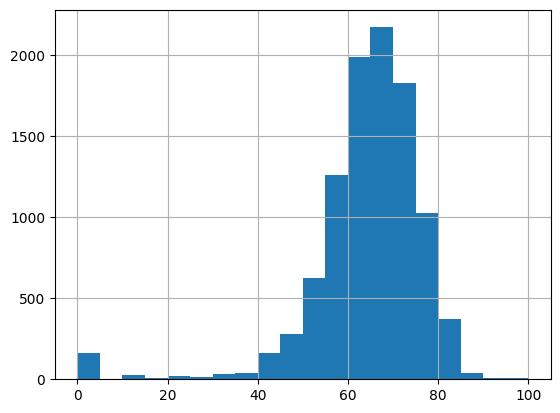

In [26]:
# ahora quiero analizar la puntuación que obtienen las películas.and
final_dataset["score"].describe()

# y también su distribución.
final_dataset["score"].hist(bins=20)
 

In [27]:
# análisis del género.
final_dataset["genre"].value_counts().head(10)


genre
Drama               556
Comedy              373
Drama, Romance      268
Horror              258
Horror, Thriller    202
Comedy, Romance     187
Documentary         131
Action, Thriller    122
Comedy, Drama       121
Romance             117
Name: count, dtype: int64

In [28]:
# quito las separaciones por comas, no es ilustrativo.

final_dataset["genre"] = final_dataset["genre"].str.split(",")
genres_exploded = final_dataset.explode("genre")

genres_exploded["genre"] = genres_exploded["genre"].str.strip()


In [ ]:
# ya se puede obtener la distribución de géneros de forma más precisa.

genres_exploded.groupby("genre")["score"].mean().sort_values(ascending=False).head(10)

# ordenado del género más al menos valorado.

genre
History      69.158768
War          69.099644
Animation    69.044704
Music        68.996364
Western      68.007634
Family       66.184604
Drama        65.982926
Fantasy      65.805091
Adventure    65.266419
Crime        65.129032
Name: score, dtype: float64

<Axes: xlabel='budget_x', ylabel='revenue'>

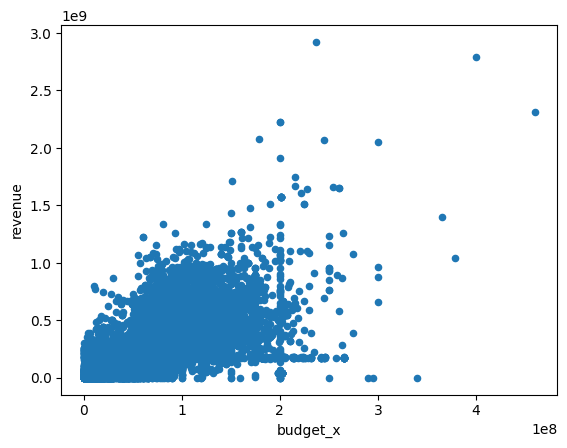

In [30]:
# también sacamos la comparativa entre presupuesto e ingresos. Obtendremos la rentabilidad y viabilidad de exito de las peliculas.

final_dataset[["budget_x", "revenue"]].describe()

final_dataset.plot.scatter(x="budget_x", y="revenue")


In [32]:
# películas con mayor valoración ordenadas en una lista de top-10.

top_10_best = final_dataset.sort_values(
    by="score",
    ascending=False
).head(10)

top_10_best[["names", "score", "genre", "revenue", "budget_x"]]


,names,score,genre,revenue,budget_x
6433,"Furin, hentai, monmon chômon",100.0,[Drama],1.569324e+09,201000000.0
934,Female Boss Hooker,100.0,"[Drama, Romance]",1.569324e+09,201000000.0
5404,The Chosen: Season 3 - Episodes 1 & 2,100.0,"[Drama, History]",1.569324e+09,201000000.0
10046,Simulant,100.0,"[Science Fiction, Thriller]",1.569324e+09,201000000.0
277,Orgasm Lecture 2,100.0,[Drama],1.569324e+09,201000000.0
443,El asistente,100.0,[Comedy],1.569324e+09,201000000.0
8232,Housekeeper,100.0,[Romance],1.569324e+09,201000000.0
4887,Pretty Young Sister 4,100.0,"[Drama, Romance]",1.569324e+09,201000000.0
7815,Rebound,98.0,[Drama],1.749201e+07,45000000.0
4755,Directing Annabelle: Creation,93.0,[Documentary],1.644265e+09,227800000.0


In [33]:
# sacamos la lista de películas con peor valoración, top-10.
top_10_worst = final_dataset.sort_values(
    by="score",
    ascending=True
).head(10)

top_10_worst[["names", "score", "genre", "revenue", "budget_x"]]


,names,score,genre,revenue,budget_x
9641,B 32 Muthal 44 Vare,0.0,[Drama],175269998.8,174600000.0
9628,고급창녀 2,0.0,[Drama],175269998.8,174600000.0
9618,Conversations in front of the camera,0.0,"[Drama, Romance]",178359863.0,185534545.8
1480,Insidious: The Red Door,0.0,"[Horror, Thriller]",175269998.8,244940000.0
1546,Indiana Jones and the Dial of Destiny,0.0,"[Adventure, Action]",1240261.6,294700000.0
1275,Blue Beetle,0.0,"[Action, Science Fiction]",1240261.6,70000000.0
7496,Little Richard: I Am Everything,0.0,"[Documentary, Music]",175269998.8,141600000.0
4966,Reminiscence,0.0,"[Drama, Romance]",15449322.0,67972729.0
4086,A Newly Wedded Couple's Sex Life,0.0,[Romance],175269998.8,181600000.0
4943,Outing 3,0.0,"[Drama, Romance]",178359863.0,185534545.8


<Axes: title={'center': 'Top 10 películas mejor valoradas'}, xlabel='names'>

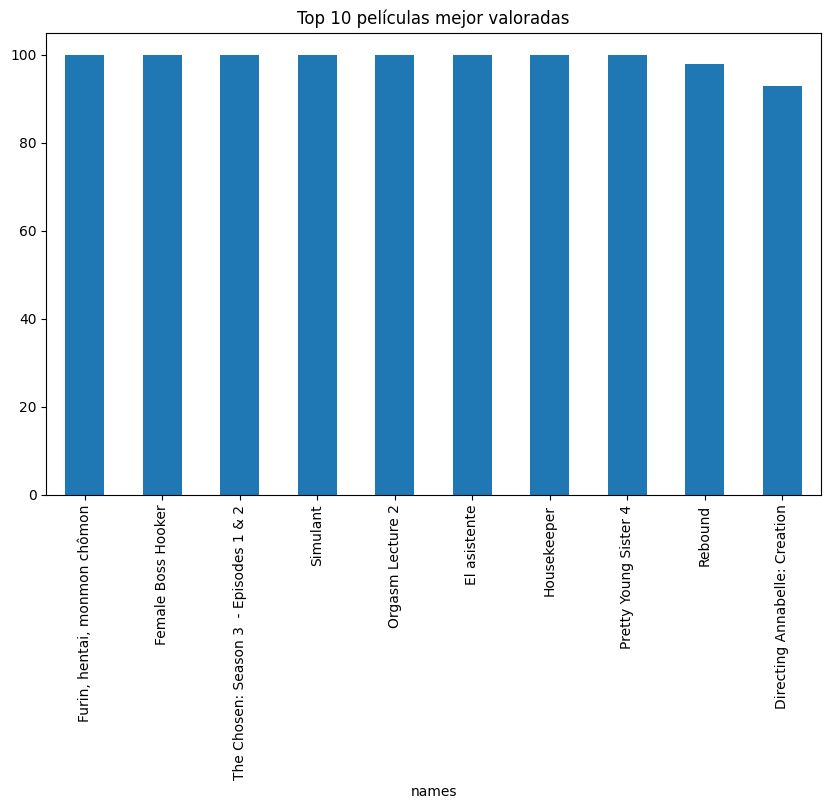

In [34]:
# con las listas se pueden ver las películas con más valoración y por el contrario. 

# dicho esto, hago vistazo rápido a modo de resumen.

top_10_best.plot.bar(
    x="names",
    y="score",
    legend=False,
    figsize=(10, 6),
    title="Top 10 películas mejor valoradas"
)


In [4]:
# por último, antes de relizar el dashboard, analizamos la rentabilidad de las películas. No quedandonos como anteriormente hicimos, viendo la valoración...
# creo la métrica rentabilidad en una nueva columna.

# lo único que al reiniciarse el kernel se ha perdido el dataset final, lo volvemos  cargar.

# Si vienes del paso 4, esto recrea el dataset final. No deja de ser volver a codear los pasos previos. Intentaremos guardarlo para que no se repita el problema.

import pandas as pd
import numpy as np

# Cargar datasets en bruto
imdb_dataset = pd.read_csv("../data/raw/IMDB Dataset.csv")
imdb_movies = pd.read_csv("../data/raw/imdb_movies.csv")

# Limpieza básica
imdb_reviews_clean = imdb_dataset.copy()
imdb_reviews_clean.drop_duplicates(inplace=True)
imdb_reviews_clean.dropna(inplace=True)

imdb_movies_clean = imdb_movies.copy()
imdb_movies_clean.drop_duplicates(inplace=True)
imdb_movies_clean.dropna(inplace=True)

# Métricas de sentimiento
total_reviews = len(imdb_reviews_clean)
positive_reviews = (imdb_reviews_clean["sentiment"] == "positive").sum()
negative_reviews = (imdb_reviews_clean["sentiment"] == "negative").sum()

positive_ratio = positive_reviews / total_reviews
negative_ratio = negative_reviews / total_reviews

# Enriquecimiento movies
imdb_movies_clean["global_positive_review_ratio"] = positive_ratio
imdb_movies_clean["global_negative_review_ratio"] = negative_ratio
imdb_movies_clean["total_reviews_analyzed"] = total_reviews

# Dataset final
final_dataset = imdb_movies_clean.copy()






In [5]:
final_dataset["profit"] = final_dataset["revenue"] - final_dataset["budget_x"]


In [6]:
# verificamos que esté creada la nueva columna con la métrica rentabilidad.
final_dataset[["budget_x", "revenue", "profit"]].head()


,budget_x,revenue,profit
0,75000000.0,2.716167e+08,1.966167e+08
1,460000000.0,2.316795e+09,1.856795e+09
2,100000000.0,7.244590e+08,6.244590e+08
3,12300000.0,3.420000e+07,2.190000e+07
4,77000000.0,3.409420e+08,2.639420e+08


In [7]:
# ahora podemos ver cuales son las peículas más rentables.
top_10_profit = final_dataset.sort_values(
    by="profit",
    ascending=False
).head(10)

top_10_profit[["names", "profit", "budget_x", "revenue", "score"]]


,names,profit,budget_x,revenue,score
68,Avatar,2.686706e+09,237000000.0,2.923706e+09,76.0
230,Avengers: Endgame,2.394732e+09,400000000.0,2.794732e+09,83.0
309,Titanic,2.022986e+09,200000000.0,2.222986e+09,79.0
6670,Titanic,2.022986e+09,200000000.0,2.222986e+09,66.0
4483,Louis Tomlinson: All of Those Voices,1.902994e+09,178800000.0,2.081794e+09,91.0
1,Avatar: The Way of Water,1.856795e+09,460000000.0,2.316795e+09,78.0
943,Star Wars: The Force Awakens,1.823224e+09,245000000.0,2.068224e+09,73.0
104,Avengers: Infinity War,1.748360e+09,300000000.0,2.048360e+09,83.0
76,Spider-Man: No Way Home,1.710048e+09,200000000.0,1.910048e+09,80.0
2649,Franco Escamilla: Eavesdropping,1.563445e+09,151000000.0,1.714445e+09,87.0


<Axes: title={'center': 'Top 10 películas más rentables'}, xlabel='names'>

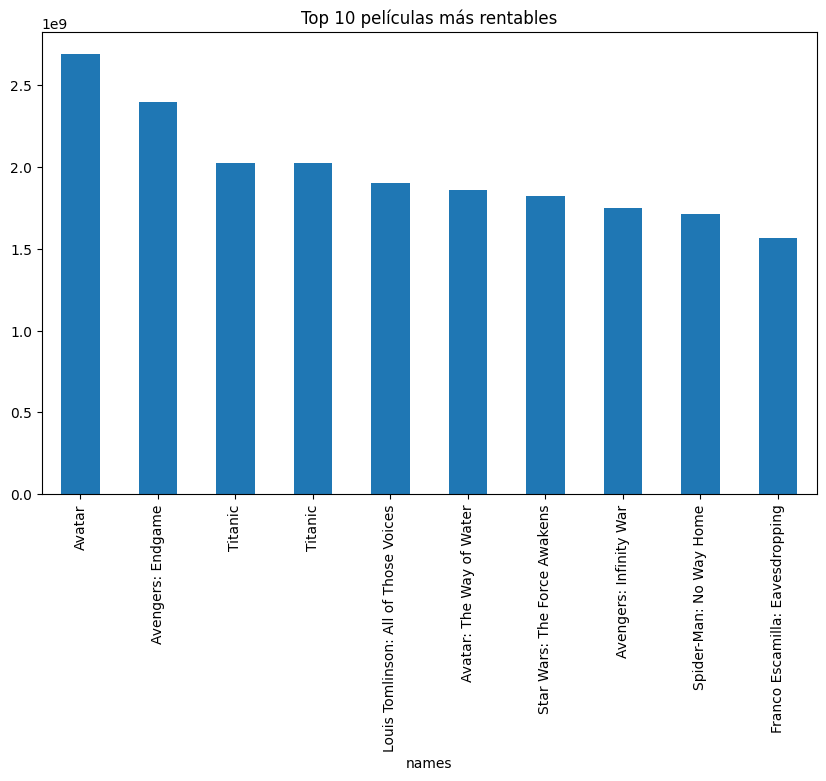

In [9]:
# creo una visualización rápida amodo de gráfico para el futuro dashboard.
top_10_profit.plot.bar(
    x="names",
    y="profit",
    figsize=(10, 6),
    legend=False,
    title="Top 10 películas más rentables"
)


In [10]:
# procedo a guardar el dataset final para poder ejecutarlo desde este punto si hubiera que hacer cambios o nuevas ampliaciones en el EDA.
final_dataset.to_csv(
    "../data/processed/final_dataset.csv",
    index=False
)


In [11]:
# también guardo de nuevo los dataset intermedios por si se pidiera reproducir algún paso anterior.
imdb_movies_clean.to_csv("../data/processed/imdb_movies_clean.csv", index=False)
imdb_reviews_clean.to_csv("../data/processed/imdb_reviews_clean.csv", index=False)


In [12]:
# Terminado el EDA, preparo el dataset final para el dashboard en Power BI.

# necesito verificar que todas as columnas necesarias están presentes en el.
final_dataset.columns


Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country',
       'global_positive_review_ratio', 'global_negative_review_ratio',
       'total_reviews_analyzed', 'profit'],
      dtype='object')

In [13]:
# este será el archivo de exportación final para el dashboard en Power BI.
final_dataset.to_csv(
    "../data/processed/final_dataset_powerbi.csv",
    index=False,
    encoding="utf-8"
)
